In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
s = pd.read_csv('ShanghaiPM20100101_20151231_Training - Training.csv')

In [3]:
s.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,date,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,2010-1-1-0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,2010-1-1-1,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,2010-1-1-2,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,2010-1-1-3,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,2010-1-1-4,0.0


In [4]:
shanghai = s.dropna()
shanghai.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,date,Iprec
4303,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,2013-1-1-0,0.0
4304,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,2013-1-1-1,0.0
4306,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,2013-1-1-3,0.0
4307,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,2013-1-1-4,0.0
4308,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,2013-1-1-5,0.0


In [5]:
shanghai.describe()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,Iprec
count,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000
mean,38846.901392,2013.988065,6.266269,3.032396,11.793976,2.502131,59.251208,55.574311,60.380222,9.987496,66.045061,1016.315999,17.034101,50.502131,0.432509
std,7476.246353,0.816873,3.520245,1.400510,6.656641,1.159499,47.436939,42.622516,51.618570,9.715268,18.523795,8.943042,9.191598,71.844689,3.282441
min,26305.000000,2013.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,2.000000,-16.000000,15.740000,994.000000,-3.000000,0.000000,0.000000
25%,32865.500000,2013.000000,3.000000,2.000000,6.000000,1.000000,29.000000,29.000000,29.500000,2.000000,53.040000,1009.000000,9.000000,6.000000,0.000000
50%,38707.000000,2014.000000,6.000000,3.000000,12.000000,3.000000,46.000000,43.000000,45.000000,11.000000,68.400000,1016.000000,18.000000,21.000000,0.000000
75%,45304.000000,2015.000000,9.000000,4.000000,18.000000,4.000000,75.000000,67.000000,74.000000,18.000000,81.480000,1023.000000,24.000000,62.000000,0.000000
max,51959.000000,2015.000000,12.000000,5.000000,23.000000,4.000000,422.000000,445.000000,574.000000,27.000000,100.000000,1040.000000,40.000000,452.000000,67.100000


In [6]:
shanghai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3519 entries, 4303 to 8586
Data columns (total 17 columns):
No            3519 non-null int64
year          3519 non-null int64
month         3519 non-null int64
day           3519 non-null int64
hour          3519 non-null int64
season        3519 non-null int64
PM_Jingan     3519 non-null float64
PM_US Post    3519 non-null float64
PM_Xuhui      3519 non-null float64
DEWP          3519 non-null float64
HUMI          3519 non-null float64
PRES          3519 non-null float64
TEMP          3519 non-null float64
cbwd          3519 non-null object
Iws           3519 non-null float64
date          3519 non-null object
Iprec         3519 non-null float64
dtypes: float64(9), int64(6), object(2)
memory usage: 494.9+ KB


In [7]:
shanghai.shape

(3519, 17)

In [8]:
shanghai.month

4303     1
4304     1
4306     1
4307     1
4308     1
4309     1
4310     1
4311     1
4312     1
4313     1
4314     1
4316     1
4317     1
4318     1
4319     1
4320     1
4321     1
4322     1
4323     1
4324     1
4325     1
4326     1
4327     1
4329     1
4330     1
4331     1
4332     1
4333     1
4334     1
4335     1
        ..
8538    12
8539    12
8540    12
8541    12
8542    12
8543    12
8544    12
8545    12
8546    12
8547    12
8548    12
8549    12
8550    12
8551    12
8552    12
8553    12
8554    12
8555    12
8556    12
8573    12
8575    12
8576    12
8577    12
8578    12
8580    12
8582    12
8583    12
8584    12
8585    12
8586    12
Name: month, Length: 3519, dtype: int64

In [9]:
shanghai['month']

4303     1
4304     1
4306     1
4307     1
4308     1
4309     1
4310     1
4311     1
4312     1
4313     1
4314     1
4316     1
4317     1
4318     1
4319     1
4320     1
4321     1
4322     1
4323     1
4324     1
4325     1
4326     1
4327     1
4329     1
4330     1
4331     1
4332     1
4333     1
4334     1
4335     1
        ..
8538    12
8539    12
8540    12
8541    12
8542    12
8543    12
8544    12
8545    12
8546    12
8547    12
8548    12
8549    12
8550    12
8551    12
8552    12
8553    12
8554    12
8555    12
8556    12
8573    12
8575    12
8576    12
8577    12
8578    12
8580    12
8582    12
8583    12
8584    12
8585    12
8586    12
Name: month, Length: 3519, dtype: int64

In [10]:
shanghai['month'].value_counts()

2     334
1     329
5     326
4     326
3     316
8     304
6     302
12    294
10    290
11    276
9     255
7     167
Name: month, dtype: int64

In [11]:
shanghai[['month', 'PM_Jingan']].head()

,month,PM_Jingan
4303,1,66.0
4304,1,67.0
4306,1,73.0
4307,1,75.0
4308,1,73.0


In [12]:
%matplotlib inline 
np.random.seed(sum(map(ord, "distributions")))

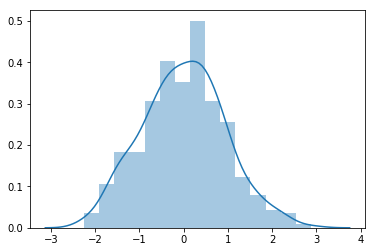

In [13]:

x = np.random.normal(size=333)
sns.distplot(x)

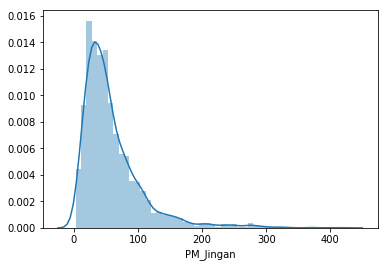

In [14]:
sns.distplot(shanghai['PM_Jingan'])

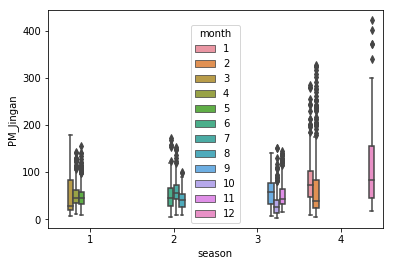

In [15]:
sns.boxplot(x="season", y="PM_Jingan", hue="month", data=shanghai);

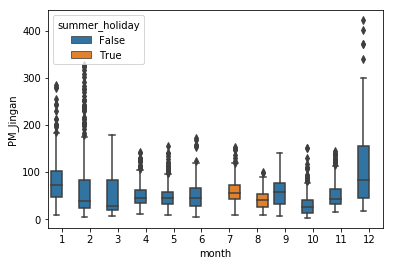

In [16]:
pd.options.mode.chained_assignment = None
shanghai["summer_holiday"] = shanghai["month"].isin(["7", "8"])
sns.boxplot(x="month", y="PM_Jingan", hue="summer_holiday", data=shanghai)

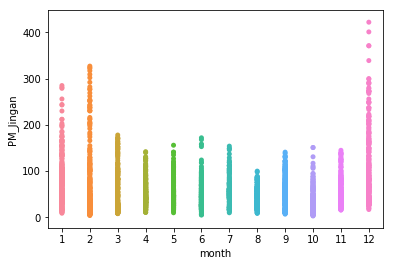

In [17]:
sns.stripplot(x="month", y="PM_Jingan", data=shanghai)

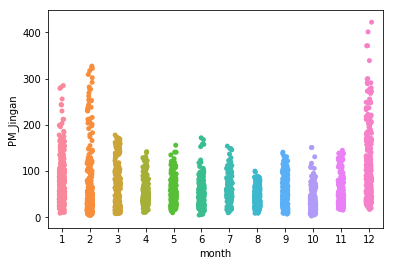

In [18]:
sns.stripplot(x="month", y="PM_Jingan", data=shanghai, jitter=True)

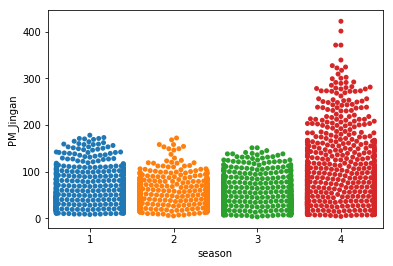

In [19]:
sns.swarmplot(x="season", y="PM_Jingan", data=shanghai)

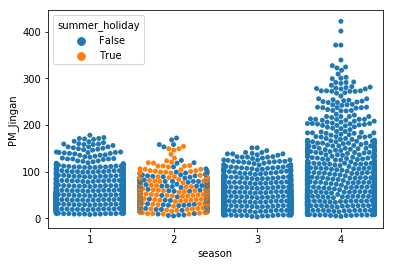

In [20]:
sns.swarmplot(x="season", y="PM_Jingan", hue="summer_holiday", data=shanghai)

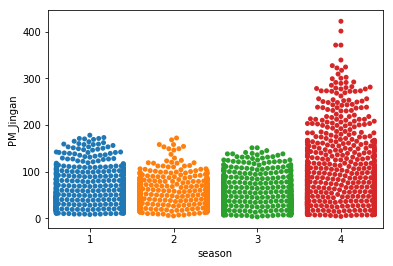

In [21]:
sns.swarmplot(x="season", y="PM_Jingan", data=shanghai)

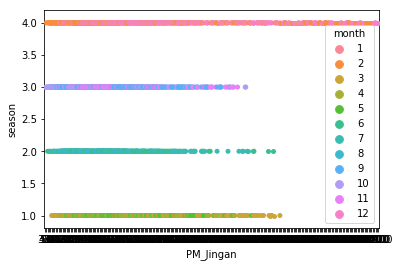

In [22]:
sns.swarmplot(x="PM_Jingan", y="season", hue="month", data=shanghai)

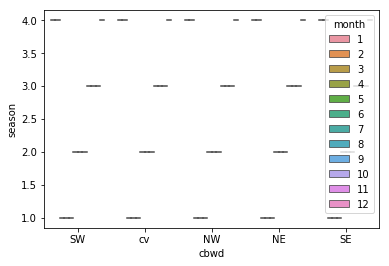

In [23]:
sns.violinplot(x="cbwd", y="season", hue="month", data=shanghai)

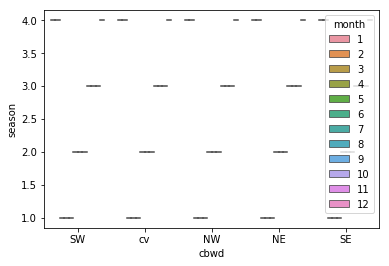

In [24]:
sns.violinplot(x="cbwd", y="season", hue="month", data=shanghai,
               bw=.1, scale="count", scale_hue=False)

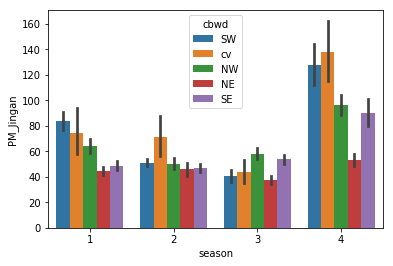

In [25]:
sns.barplot(x="season", y="PM_Jingan", hue="cbwd", data=shanghai)

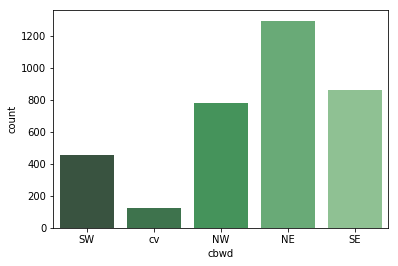

In [26]:
sns.countplot(x="cbwd", data=shanghai, palette="Greens_d")

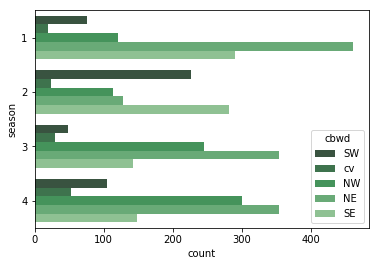

In [27]:
sns.countplot(y="season", hue="cbwd", data=shanghai, palette="Greens_d")

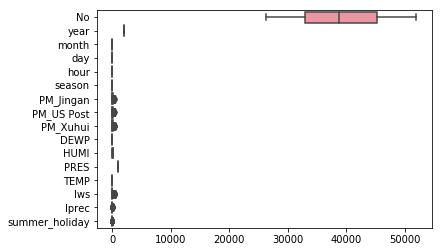

In [28]:
sns.boxplot(data=shanghai, orient="h")

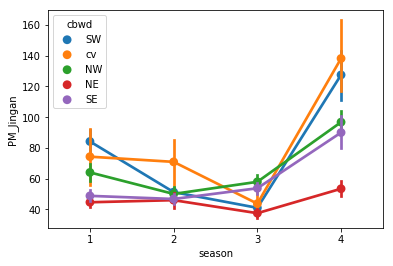

In [29]:
sns.pointplot(x="season", y="PM_Jingan", hue="cbwd", data=shanghai)

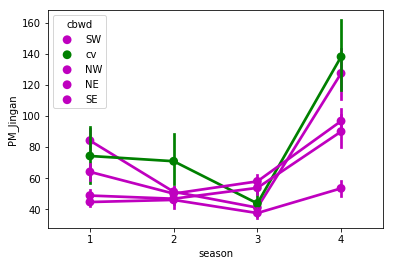

In [30]:

sns.pointplot(x="season", y="PM_Jingan", hue="cbwd", data=shanghai,
              palette={"cv": "g", "SE": "m", "NE": "m", "NW": "m", "SW": "m"})

In [31]:
# sns.pairplot(shanghai)

In [32]:
# sns.pairplot(shanghai, hue="season")

          DEWP      HUMI      PRES      TEMP
DEWP  1.000000  0.432536 -0.823486  0.867626
HUMI  0.432536  1.000000 -0.208672 -0.063270
PRES -0.823486 -0.208672  1.000000 -0.808655
TEMP  0.867626 -0.063270 -0.808655  1.000000


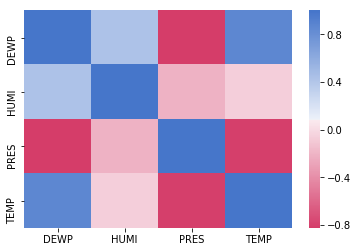

In [33]:

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = shanghai[['DEWP', 'HUMI', 'PRES', 'TEMP']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

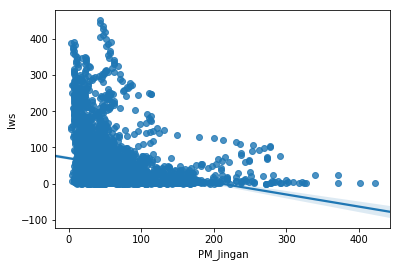

In [34]:
sns.regplot(x="PM_Jingan", y="Iws", data=shanghai)

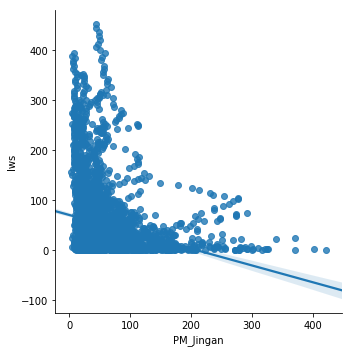

In [35]:

sns.lmplot(x="PM_Jingan", y="Iws", data=shanghai)

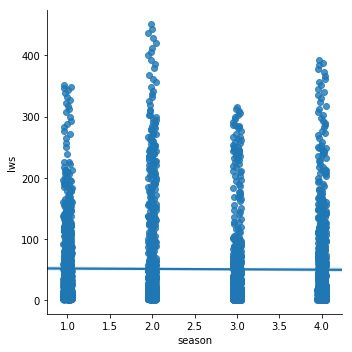

In [36]:
sns.lmplot(x="season", y="Iws", data=shanghai, x_jitter=.05);

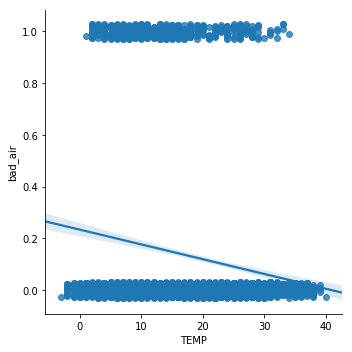

In [37]:
pd.options.mode.chained_assignment = None
shanghai["bad_air"] = (shanghai.PM_Jingan) > 100
sns.lmplot(x="TEMP", y="bad_air", data=shanghai,
           y_jitter=.03)

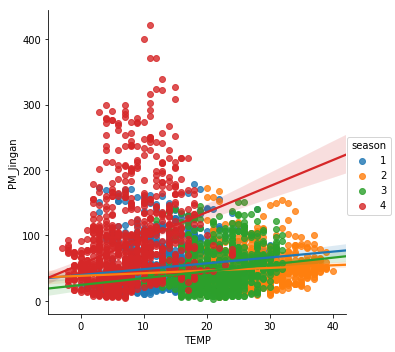

In [38]:
sns.lmplot(x="TEMP", y="PM_Jingan", hue="season", data=shanghai)

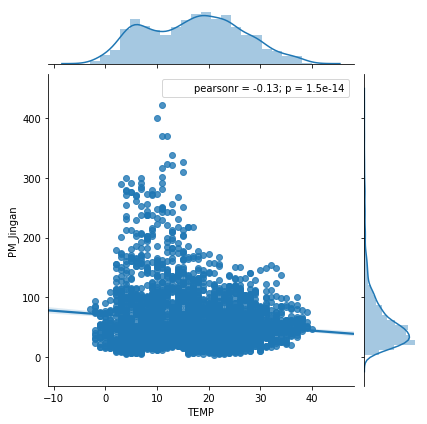

In [39]:
sns.jointplot(x="TEMP", y="PM_Jingan", data=shanghai, kind="reg")

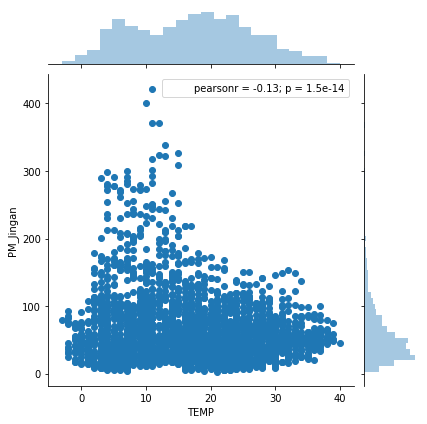

In [40]:
sns.jointplot(x="TEMP", y="PM_Jingan", data=shanghai)

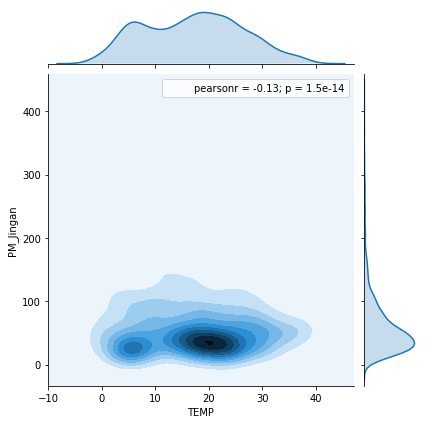

In [41]:
sns.jointplot(x="TEMP", y="PM_Jingan", data=shanghai, kind="kde")

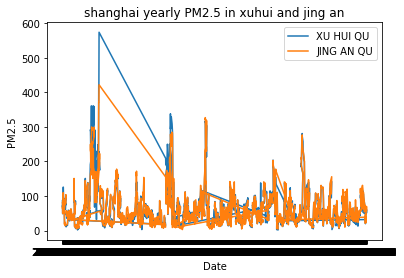

In [42]:
vti = shanghai


plt.plot(vti["date"], vti["PM_Xuhui"], label="XU HUI QU")
plt.plot(vti["date"], vti["PM_Jingan"], label="JING AN QU")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.title("shanghai yearly PM2.5 in xuhui and jing an")
plt.legend()
plt.show()

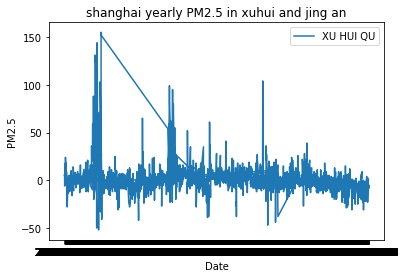

In [43]:
plt.plot(vti["date"], vti["PM_Xuhui"]-vti["PM_Jingan"], label="XU HUI QU")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.title("shanghai yearly PM2.5 in xuhui and jing an")
plt.legend()
plt.show()

# Before looking into dateset

    This is a piece of date about shanghai air pollution(pm2.5), there are data coloums of number, year, month, day, hour, season; city area of Jingan, US Post, and Xuhui; and there are also humid, pressure, temperture, possiblty of rain, and wind.
    My work is to first clean the data, and try to use different method to find some connections between air pollution and other attributions.
    

# Cleaning

## Missing data, value, bad data

The data set I’m using contain pretty much missing values. From year of 2012 to 2013, PM_Jingan data missing and leave a lot of NA. In first few steps, I showed the head of data, and its clear that PM value is not in data. Thus, I used dropna() to clean the data. In some other perspective, the data is in good sequence, and the value accuracy dose not affect result a lot.

# EDA

From In[5], we should skip number, year,month,day,hour and season, we look into the PM value of Jingan, we will find that 75% data indicate PM2.5 is equal or less than 75, which means air quality is basicly good, but the max value is up to 422. Same conclusion result from In[14], the distribution diagram, we will find most data distributed at 0-100, but few drop to more than 150.

So how PM2.5 pollution perform during every year? From In[16], when we set July and August as summer holiday, we can see the PM pollution is relatively low. And from In[19], we can see winter is the season that we are more easily to get a bed air condition.

Does wind affect air pollution? From In[31-46], we can see that most common wind in shanghai Jingan is NE wind. NE wind is helping air condition a lot because in city is in NE wind, the air condition is always best among all wind directions in four seasons. 

Check out In[24], we will find some connection between temp and air condition. We mark the day which PM value great than 200 as badly pollution day, and we compare the counts of bad air day with temp, we could find that the high temperature will lower the possibility of getting bad air. This conclusion is confirmed in all seasons, and especially right in winter according to In[26].

In[61][62] is the comparison of two different areas of shanghai, the data begin at 2013, end at 2015, and the time gap between each piece of data is just 1 hour. We can drew conclusion that Jingan and Xuhui always have same PM value and the difference is always less than 25. This means the great area of shanghai will always have same air condition.
However, unfortunately during EDA, I found there are some outliers espacially in In[61],
there is no way to determine if its the truth or wrong data.

# Part B

In [ ]:
from urllib.request import urlopen  
from urllib.parse import urlparse  
from bs4 import BeautifulSoup   
from urllib  import request  
import csv
import urllib
import re  
import datetime  
import io  
import os  
import sys

  
pages = set() 
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}  

def getExternalLinks(bsObj, excludeUrl):  
    externalLinks = []
    #find all“http”or“www”headed,and not include domain
    for link in bsObj.findAll("a", href=re.compile("^(http|www)((?!"+excludeUrl+").)*$")):  
        if link.attrs['href'] is not None:  
            if link.attrs['href'] not in externalLinks:  
                externalLinks.append(link)
    return externalLinks 

opener = urllib.request.build_opener()  
opener.addheaders = [('User-agent', 'Mozilla/49.0.2')] 
def checkLink(tempUrl):
    try :  
        opener.open(tempUrl)
        print(tempUrl+'-------Connection succeed') 
        return 1
    except urllib.error.HTTPError:  
        print(tempUrl+'-------HTTPError')
        return 0
    except urllib.error.URLError:  
        print(tempUrl+'-------URLError') 
        return 0

def getAllExternalLinks(siteUrl):  
  
    req=request.Request(siteUrl,headers=headers)  
    html=urlopen(req)  
    bsObj=BeautifulSoup(html.read(),"html.parser")  
    domain = urlparse(siteUrl).netloc  
    externalLinks = getExternalLinks(bsObj,domain)  

    fileHeader = ['Links','Link Description', 'Valid?','Last Checking Time']
    csvFile = open("extLink.csv", "w", newline="")
    writer = csv.writer(csvFile)
    writer.writerow(fileHeader)
    
    for link in externalLinks:  
            if checkLink(link.attrs['href'])==1:
                now = datetime.datetime.now()
                otherStyleTime = now.strftime("%Y-%m-%d %H:%M:%S")
                writer.writerow([link.attrs['href'],link.string,"TRUE",otherStyleTime])
            else:
                now = datetime.datetime.now()
                otherStyleTime = now.strftime("%Y-%m-%d %H:%M:%S")
                writer.writerow([link.attrs['href'],link.string,"FALSE",otherStyleTime])

    csvFile.close()
    print("completed, please see the .CSV file")
#----------------------------------------------------------------------------------------------
#input links below-----------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
getAllExternalLinks("http://www.zealer.com/") 

http://s.zealer.com/-------Connection succeed
http://yueyear.com/-------URLError
http://s.zealer.com/-------Connection succeed
http://yueyear.com/-------URLError
http://s.zealer.com/-------Connection succeed
http://s.zealer.com/rephone?tab=diy-------Connection succeed
http://s.zealer.com/repair-------Connection succeed
http://s.zealer.com/repair-------Connection succeed
http://s.zealer.com/repair-------Connection succeed
http://s.zealer.com/repair-------Connection succeed
http://yueyear.com/-------URLError
http://yueyear.com/interest/237-------URLError
http://yueyear.com/interest/236-------URLError
